# **Convolutional Neural Networks (CNNs)**

### **1. Introduction: The Motivation Behind CNNs**

At its core, a Convolutional Neural Network (CNN or ConvNet) is a specialized type of deep neural network designed to process and analyze data with a grid-like topology, such as an image. An image can be represented as a 2D grid of pixels, or a 3D grid if color channels (Red, Green, Blue) are included.

**The Problem with Traditional Neural Networks (Multi-Layer Perceptrons - MLPs):**

If one were to use a standard MLP to classify an image, say 100x100 pixels in color, the process would be highly inefficient and ineffective for several reasons:

1.  **Massive Number of Parameters:** A 100x100x3 image has 30,000 pixels. The first hidden layer of an MLP would require every one of its neurons to be connected to every single input pixel. If this layer had just 1,000 neurons, it would result in 30,000 * 1,000 = 30 million weights (parameters) for the first layer alone. This leads to an enormous risk of overfitting and immense computational cost.
2.  **Loss of Spatial Information:** An MLP flattens the input image into a 1D vector. This process destroys the spatial hierarchy and relationships between pixels. For an MLP, a pixel in the top-left corner has no more inherent relationship to its immediate neighbor than it does to a pixel in the bottom-right corner. In reality, nearby pixels are highly correlated and form meaningful local structures (edges, corners, textures).

**The CNN Solution:**

CNNs are engineered to overcome these limitations by leveraging three key architectural ideas:

*   **Local Receptive Fields:** Neurons are only connected to a small, localized region of the input, not the entire input.
*   **Parameter (Weight) Sharing:** The same set of weights (a "kernel" or "filter") is used to scan across the entire input. This drastically reduces the number of parameters.
*   **Hierarchical Feature Learning:** The network learns simple features (like edges) in the initial layers and combines them to form more complex features (like shapes, eyes, or wheels) in deeper layers.

---

### **2. The Core Building Blocks of a CNN**

A CNN is not a single monolithic entity but a sequence of interconnected layers. The most fundamental layers are the Convolutional Layer, the Activation Layer, and the Pooling Layer.

#### **2.1. The Convolutional Layer: The Heart of the CNN**

This layer performs the primary feature extraction. Its operation is defined by several key components:

**A. The Input Volume:**
The input to a convolutional layer is typically a 3D tensor of shape `(height, width, depth)`.
*   For the first layer, this is the raw image itself, where `depth` is the number of color channels (e.g., 3 for RGB, 1 for grayscale).
*   For subsequent layers, the input is the output of a previous layer (a "feature map"), where `depth` represents the number of features detected by that layer.

**B. The Kernel / Filter:**
The kernel is the central element of the convolutional layer.
*   **What it is:** A small, learnable matrix of weights. It has a small spatial dimension (e.g., 3x3, 5x5) but its depth **must match the depth of the input volume**. For example, if the input is a 32x32x3 RGB image, a valid kernel could be 5x5x3.
*   **What it does:** Each kernel is designed to learn and detect a specific, low-level feature from the input. For instance, one kernel might learn to detect vertical edges, another might detect a specific color blob, and a third might detect a particular texture. The values within the kernel's weight matrix are what define the feature it is looking for. These weights are initialized randomly and then learned during the training process via backpropagation.

**C. The Convolution Operation:**
This is the mathematical process of applying the kernel to the input.
1.  The kernel is placed over a small patch of the input volume, starting at the top-left corner.
2.  An element-wise multiplication is performed between the kernel's weights and the corresponding pixel values in the input patch.
3.  All the results of this multiplication are summed up, and a single bias term is added to this sum.
4.  The final sum is a single number, which becomes one entry in the output **Feature Map** (or **Activation Map**).
5.  The kernel then "slides" or "convolves" over to the next position in the input volume and repeats the process.

> **Numerical Example:**
> Consider a 5x5 single-channel input (depth=1) and a 3x3 kernel (depth=1).
>
> `Input Patch (3x3)` | `Kernel (3x3)` | `Calculation`
> :--- | :--- | :---
> `[[1, 0, 2],` | `[[1, 0, -1],` | `(1*1 + 0*0 + 2*(-1)) +`
> ` [2, 1, 1],` | ` [1, 1, -1],` | `(2*1 + 1*1 + 1*(-1)) +`
> ` [0, 1, 3]]` | ` [0, 1, -1]]` | `(0*0 + 1*1 + 3*(-1)) = -2`
>
> The value `-2` would be the top-left entry in the output feature map.

<div align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/9/90/CNN-filter-animation-1.gif?20230201202141" width="500" alt="CNN filter animation"/>
</div>


**D. The Feature Map (Activation Map):**
The output of the convolution operation is a 2D matrix called a feature map.
*   It represents a "map" of where the kernel's specific feature was detected in the input.
*   A high positive value in the feature map indicates a strong presence of the feature at that location. A value near zero or a large negative value indicates the absence of the feature.
*   A single convolutional layer typically contains **multiple kernels**. Each kernel produces its own unique 2D feature map. These maps are then stacked together to form the final output volume of the layer. If a convolutional layer has 64 kernels, its output will be a volume with a depth of 64.

**E. Hyperparameters of the Convolutional Layer:**

*   **Stride:** This defines the step size the kernel takes as it moves across the input. A stride of 1 means the kernel moves one pixel at a time. A stride of 2 means it moves two pixels at a time. A larger stride results in a smaller output feature map (a form of downsampling) and less overlap between receptive fields.
*   **Padding:** This involves adding a border of zeros (or other values) around the input volume. Padding serves two critical purposes:
    1.  **Preserving Spatial Dimensions:** Without padding, each convolutional operation shrinks the output size. "Same" padding adds enough zeros so that the output height and width are the same as the input. "Valid" padding means no padding is used, and the output is smaller.
    2.  **Improving Edge Processing:** Without padding, the pixels at the very edge of the image are processed by the kernel far fewer times than the pixels in the center. Padding allows the kernel to be centered on edge and corner pixels, giving them more influence.

<br><br>
#### **2.2. The Activation Layer (Introducing Non-Linearity)**

After the convolution operation, which is a linear operation (matrix multiplication and addition), an activation function is applied element-wise to the feature map.

*   **Purpose:** To introduce non-linearity into the network. Without non-linearity, stacking multiple convolutional layers would be equivalent to a single, more complex convolutional layer. Non-linearity allows the network to learn much more complex functions.
*   **ReLU (Rectified Linear Unit):** This is the most common activation function used in CNNs. Its function is `f(x) = max(0, x)`. It simply changes all negative values in the feature map to zero and leaves positive values unchanged.
    *   **Advantages:** It is computationally very efficient and helps mitigate the vanishing gradient problem, which can plague deeper networks.
    
<br><br>

#### **2.3. The Pooling Layer (Downsampling)**

The pooling layer is typically inserted between successive convolutional layers.

*   **Purpose:** To progressively reduce the spatial dimensions (height and width) of the feature maps. This has several benefits:
    1.  **Reduces Computational Load:** Fewer parameters and computations are needed in subsequent layers.
    2.  **Controls Overfitting:** By summarizing features in a neighborhood, it makes the model more robust to small variations in the input.
    3.  **Provides Translation Invariance:** It makes the feature detection more robust to the exact position of the feature in the input. If a feature is shifted slightly, the output of max pooling is likely to remain the same.

*   **Max Pooling:** This is the most common form of pooling. A window (e.g., 2x2) is slid over the feature map, and for each window, the maximum value is taken as the output. The window then moves according to a specified stride (usually 2).
*   **Average Pooling:** Instead of the maximum value, the average value within the window is taken. It is less common but used in certain architectures.

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*fXxDBsJ96FKEtMOa9vNgjA.gif" width="500" alt="CNN filter animation"/>
</div>

---

### **3. Assembling the Full CNN Architecture**

A typical CNN architecture for image classification follows a standard pattern:

**INPUT -> [CONV -> RELU -> POOL] * N -> FLATTEN -> [FC -> RELU] * M -> OUTPUT**
<div align="center">
  <img src="https://media.licdn.com/dms/image/v2/D5612AQGOui8XZUZJSA/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1680532048475?e=2147483647&v=beta&t=5gZVHYNL2Vc2mK3iKrpK-FcpURIFdyaP4Vi38eeeZyM" width="700" alt="CNN-related illustration"/>
</div>

1.  **Input Layer:** Holds the raw pixel values of the image `(H x W x D)`.

2.  **Convolutional Base (Feature Extractor):** A sequence of `[CONV -> RELU -> POOL]` blocks.
    *   **Early Layers:** Learn low-level features like edges, corners, and color gradients. The kernels are small and capture local details.
    *   **Deeper Layers:** Receive feature maps from earlier layers as input. They learn to combine the simple features into more complex and abstract concepts like "eye," "nose," "wheel," or "text." The receptive field of these layers is effectively larger, allowing them to "see" a greater portion of the original image.

3.  **Flatten Layer:** This is a crucial transition layer. The final pooled feature map, which is a 3D volume (e.g., 7x7x512), is unrolled or "flattened" into a single long 1D vector. This vector contains all the high-level, abstract features learned by the convolutional base.

4.  **Fully Connected (FC) Layers (Classifier):**
    *   These are standard Multi-Layer Perceptron layers. Every neuron in an FC layer is connected to every activation in the previous layer (the flattened vector).
    *   **Purpose:** To take the high-level features from the convolutional base and learn the non-linear combinations of these features that are relevant for the final classification task. For example, it learns that the presence of "eye," "nose," and "mouth" features in a certain spatial arrangement strongly predicts the "face" class.

5.  **Output Layer:**
    *   The final fully connected layer that produces the prediction. The number of neurons in this layer equals the number of classes to be predicted.
    *   **Activation Function:**
        *   **Softmax:** For multi-class classification, Softmax is used. It takes the raw output scores (logits) from the final layer and converts them into a probability distribution, where each value represents the probability of the input belonging to a particular class, and all probabilities sum to 1.
        *   **Sigmoid:** For binary classification, a single neuron with a Sigmoid activation is used to output a probability between 0 and 1.
        
---

### **4. The Training Process**

For the network to learn, it must be trained on a large dataset of labeled images.

1.  **Forward Propagation:** An input image is passed through the entire network, from the input layer to the output layer, to produce a prediction (a probability distribution over the classes).

2.  **Loss Function:** A loss function (or cost function) measures how inaccurate the network's prediction is compared to the true label. For multi-class classification, **Categorical Cross-Entropy** is the standard loss function. It quantifies the difference between the predicted probability distribution and the actual distribution (where the true class has a probability of 1 and all others are 0).

3.  **Backpropagation:** This is the algorithm used to calculate the gradient of the loss function with respect to every single weight and bias in the network. It propagates the error signal backward from the output layer to the input layer.

4.  **Optimizer:** An optimization algorithm, such as **Adam**, **RMSprop**, or **Stochastic Gradient Descent (SGD)**, uses these calculated gradients to update the weights and biases in the network. The goal is to adjust the weights in the direction that minimizes the loss function. This process is repeated for many epochs (passes through the entire training dataset) until the network's performance converges.

---

### **5. Advanced Concepts**

*   **Dropout:** A regularization technique to prevent overfitting. During training, a random fraction of neurons (and their connections) are temporarily "dropped out" or ignored for each training sample. This forces the network to learn more robust and redundant features, as it cannot rely on any single neuron.
*   **Batch Normalization:** A technique applied between layers (often between CONV/FC and ReLU). It normalizes the activations of the previous layer to have a mean of 0 and a standard deviation of 1. This stabilizes and accelerates the training process, allowing for higher learning rates and reducing the network's sensitivity to weight initialization.
*   **Famous Architectures:**
    *   **LeNet-5 (1998):** The pioneering CNN for digit recognition.
    *   **AlexNet (2012):** A deep CNN that won the ImageNet competition, popularizing the use of ReLU, Dropout, and GPUs for training.
    *   **VGGNet (2014):** Demonstrated that a very deep network built from simple, stacked 3x3 convolutional layers could achieve excellent performance.
    *   **GoogLeNet / Inception (2014):** Introduced the "Inception module," which performs convolutions with different kernel sizes in parallel and concatenates their outputs, allowing the network to capture features at multiple scales simultaneously.
    *   **ResNet / Residual Networks (2015):** A breakthrough architecture that enabled the training of extremely deep networks (over 150 layers). It introduced "skip connections" or "shortcuts" that allow the gradient to flow more easily through the network, solving the vanishing gradient problem in very deep models.

---

### **6. Applications and Use Cases**

CNNs are the workhorse of modern computer vision and have applications across countless domains:

*   **Image Classification:** Assigning a label to an entire image (e.g., "cat," "dog").
*   **Object Detection:** Identifying and drawing bounding boxes around multiple objects in an image (e.g., YOLO, R-CNN families).
*   **Semantic Segmentation:** Classifying every single pixel in an image to a class, creating a pixel-level map (e.g., for autonomous driving to identify road, pedestrians, cars).
*   **Facial Recognition:** Used in security, surveillance, and social media photo tagging.
*   **Medical Image Analysis:** Detecting tumors in MRIs, identifying diabetic retinopathy from eye scans, analyzing X-rays.
*   **Autonomous Vehicles:** Real-time perception of the environment, including lane detection, traffic sign recognition, and pedestrian detection.
*   **Art & Style Transfer:** Transferring the artistic style of one image onto the content of another.
*   **Beyond 2D Images:** CNNs can be adapted to 1D data (for text classification in NLP or time-series analysis) and 3D data (for video analysis or volumetric medical scans like CTs).

---

### **7. Advantages and Limitations**

**Advantages:**

*   **Automatic Feature Extraction:** Eliminates the need for manual, hand-crafted feature engineering.
*   **Parameter Sharing & Efficiency:** Drastically fewer parameters than fully connected networks for image data.
*   **Translation Invariance:** Robust to the position of features in the image.
*   **Hierarchical Representation:** Learns a meaningful hierarchy of features from simple to complex.

**Limitations:**

*   **Data-Hungry:** Requires large labeled datasets for training from scratch.
*   **Computationally Expensive:** Training can require significant GPU resources and time.
*   **"Black Box" Nature:** Understanding *why* a CNN made a particular decision can be difficult (interpretability is an active area of research).
*   **Vulnerability to Adversarial Attacks:** Small, imperceptible perturbations to an input image can cause the network to make a completely wrong prediction with high confidence.
*   **Lack of Rotational Invariance:** While invariant to translation, standard CNNs are not inherently invariant to rotation or changes in scale (though data augmentation helps).

##   

# **About the Dataset**

**Fashion-MNIST** is a dataset of *Zalando's* article images designed as a drop-in replacement for the original MNIST dataset. It was created to provide a more challenging alternative to the classic MNIST handwritten digits dataset while maintaining the same structure and ease of use.

## **Overview**

Fashion-MNIST consists of grayscale images of fashion products from 10 categories. Each image is **28×28** pixels, just like the original MNIST. The dataset was introduced in 2017 by researchers from *Zalando* Research as they found that MNIST had become too easy for modern machine learning algorithms, with many achieving near-perfect accuracy.

<div align="center">
  <img src="https://datasets.activeloop.ai/wp-content/uploads/2022/09/Fashion-MNIST-dataset-Activeloop-Platform-visualization-image.webp" width="480" alt="CNN filter animation"/>
</div>
<br><br>

## **Dataset Structure**

The dataset contains 70,000 images total, divided as follows:

| Split | Number of Images | Purpose |
|-------|-----------------|---------|
| Training Set | 60,000 | Used to train machine learning models |
| Test Set | 10,000 | Used to evaluate model performance |

<br><br>
## **Categories and Labels**

Fashion-MNIST includes 10 different fashion categories, each assigned a numerical label:

| Label | Category | Description |
|-------|----------|-------------|
| 0 | T-shirt/top | Upper body garments with short sleeves |
| 1 | Trouser | Long pants/trousers |
| 2 | Pullover | Sweaters and pullovers |
| 3 | Dress | One-piece dresses |
| 4 | Coat | Outerwear coats and jackets |
| 5 | Sandal | Open-toe footwear |
| 6 | Shirt | Button-up shirts with collars |
| 7 | Sneaker | Athletic/casual shoes |
| 8 | Bag | Handbags and bags |
| 9 | Ankle boot | Boots that cover the ankle |

<br><br>

## **Image Characteristics**

Each image in Fashion-MNIST has specific properties that make it suitable for machine learning tasks:

| Property | Value | Details |
|----------|-------|---------|
| Dimensions | 28 × 28 pixels | Same as original MNIST |
| Color | Grayscale | Single channel (0-255 values) |
| Background | Black | Dark background (low pixel values) |
| Object | White/Gray | Fashion item in lighter shades |
| File Size | 784 bytes per image | 28 × 28 = 784 pixels |
| Normalization | Centered | Items are roughly centered in frame |

<br><br>
## **Why Fashion-MNIST?**

The dataset was created to address several limitations of the original MNIST:

**Difficulty Level**: MNIST had become too easy, with simple models achieving 99%+ accuracy. Fashion-MNIST provides a more realistic challenge with typical accuracies ranging from 85-95% depending on the model complexity.

**Real-world Relevance**: Fashion items are more complex than handwritten digits, featuring varied textures, shapes, and styles that better represent real-world computer vision challenges.

**Direct Compatibility**: The dataset maintains the exact same format as MNIST (28×28 grayscale images, 10 classes, 60k/10k split), making it a true drop-in replacement that requires no code changes.

<br><br>
## **Dataset Statistics**

| Metric | Value | Notes |
|--------|-------|-------|
| Total Dataset Size | ~30 MB compressed | Relatively small and easy to download |
| Images per Class (Training) | 6,000 | Perfectly balanced across all 10 classes |
| Images per Class (Test) | 1,000 | Perfectly balanced across all 10 classes |
| Pixel Value Range | 0-255 | Standard 8-bit grayscale |
| Average Pixel Value | ~72 | Indicates mostly dark backgrounds |

<br><br>
## **Common Use Cases**

Fashion-MNIST serves multiple purposes in the machine learning community:

**Educational Tool**: It's widely used in tutorials and courses as a step up from MNIST, providing students with a more challenging yet manageable dataset.

**Benchmarking**: Researchers use it to compare different algorithms and architectures on a standardized task that's more difficult than MNIST but still computationally accessible.

**Prototyping**: The small size and standard format make it ideal for quickly testing new ideas before moving to larger, more complex datasets.

**Algorithm Development**: It provides a good balance of complexity for developing and testing new machine learning techniques without requiring extensive computational resources.
<br><br>
## **Challenges and Considerations**

While Fashion-MNIST improves upon MNIST, it still has some limitations. The images are quite small at 28×28 pixels, which doesn't capture fine details of fashion items. The grayscale format removes color information that could be important for fashion classification. Additionally, the dataset only covers basic fashion categories and doesn't include many subcategories or style variations found in real fashion applications.

The dataset also exhibits some class confusion patterns. For example, shirts and t-shirts/tops can be difficult to distinguish, as can pullovers and coats. Sneakers and ankle boots also share similar shapes that can challenge classifiers.

Despite these limitations, Fashion-MNIST remains one of the most popular benchmark datasets in computer vision, striking an excellent balance between accessibility and challenge for both beginners and experienced practitioners.

##       

## **Importing the required libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
# 1. Load and preprocess the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# Reshape data to include channel dimension (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Convert labels to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

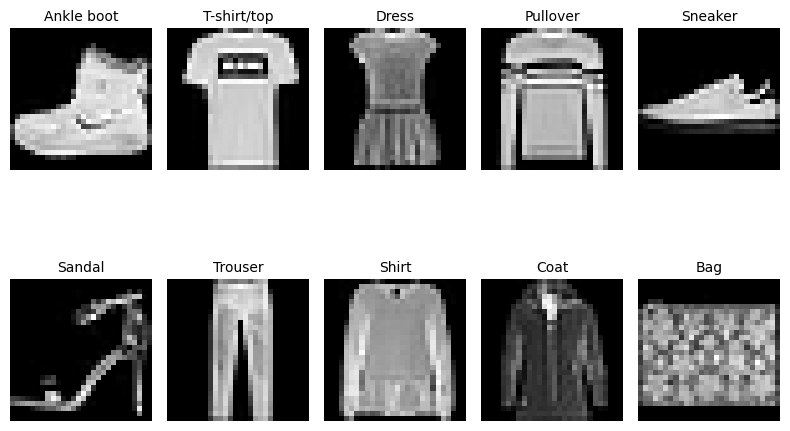

In [ ]:
# Sample image from each category
plt.figure(figsize=(8, 6))
shown = set()
count = 0

for i in range(len(y_train)):
    label = np.argmax(y_train[i])
    if label not in shown:
        plt.subplot(2, 5, count + 1)
        plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
        plt.title(class_names[label], fontsize=10)
        plt.axis('off')
        shown.add(label)
        count += 1
        if count == 10:
            break

plt.tight_layout()
plt.show()

In [ ]:
# 2. Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator to the training data
datagen.fit(X_train)

In [ ]:
# 3. Build the advanced CNN model
def build_cnn_model():
    model = models.Sequential([

        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)), # 1st conv layer
        layers.BatchNormalization(),                                                           # Normalize activations
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),                          # 2nd conv layer
        layers.BatchNormalization(),                                                           # Normalize again
        layers.MaxPooling2D((2, 2)),                                                           # Downsample spatial size
        layers.Dropout(0.25),                                                                  # Dropout to reduce overfitting

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),                          # 3rd conv layer
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),                          # 4th conv layer
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),                         # 5th conv layer
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),                         # 6th conv layer
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Flatten and Dense Layers
        layers.Flatten(),                                                                      # Flatten feature maps into a 1D vector
        layers.Dense(512, activation='relu'),                                                  # Fully connected layer with 512 units
        layers.BatchNormalization(),
        layers.Dropout(0.5),                                                                   # Heavier dropout before next dense layer
        layers.Dense(256, activation='relu'),                                                  # Fully connected layer with 256 units
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')                                                 # Output layer for 10 classes, "Softmax" for Multi-class Classification
    ])
    return model

# Initialize the model
model = build_cnn_model()

In [ ]:
# 4. Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,015,530 (3.87 MB)

 Trainable params: 1,013,098 (3.86 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [ ]:
# 5. Define callbacks
# Save the best model to Google Drive
model_path = '/content/drive/MyDrive/Fashion_MNIST/fashion_mnist_best_model.keras'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, verbose=1)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

In [ ]:
# 6. Train the model with data augmentation
batch_size = 128
epochs = 100

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint, early_stopping, reduce_lr],
                    verbose=1)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5900 - loss: 1.2816
Epoch 1: val_accuracy improved from -inf to 0.40560, saving model to /content/drive/MyDrive/Fashion_MNIST_Grok/fashion_mnist_best_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.5902 - loss: 1.2808 - val_accuracy: 0.4056 - val_loss: 2.3313 - learning_rate: 0.0010
Epoch 2/100
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7907 - loss: 0.5592
Epoch 2: val_accuracy improved from 0.40560 to 0.82850, saving model to /content/drive/MyDrive/Fashion_MNIST_Grok/fashion_mnist_best_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.7907 - loss: 0.5591 - val_accuracy: 0.8285 - val_loss: 0.4573 - learning_rate: 0.0010
Epoch 3/100
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8298 - loss: 0.4593
Epoch 3: val_accuracy improved from 0.82850 to 0.86450, saving model to /content/drive/MyDrive/Fashion_MNIST_Grok/fashion_mnist_best_model.keras
469/469 ━━━━━━━━━━

In [ ]:
# 7. Load and evaluate the best model from Google Drive
model = tf.keras.models.load_model(model_path)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'\nTest accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9392 - loss: 0.1793

Test accuracy: 0.9389, Test loss: 0.1721


In [ ]:
# 8. Classification report and confusion matrix
# Get predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test  # Use original integer labels (not one-hot encoded)

# Debug: Print shapes and sample values to verify
print(f"Shape of true_classes: {true_classes.shape}")
print(f"Sample true_classes: {true_classes[:5]}")
print(f"Shape of predicted_classes: {predicted_classes.shape}")
print(f"Sample predicted_classes: {predicted_classes[:5]}")

# Ensure both are 1D arrays of integers
if true_classes.ndim > 1:
    true_classes = np.argmax(true_classes, axis=1)
if predicted_classes.ndim > 1:
    predicted_classes = np.argmax(predicted_classes, axis=1)

# Verify again after potential correction
print(f"Corrected shape of true_classes: {true_classes.shape}")
print(f"Corrected shape of predicted_classes: {predicted_classes.shape}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Shape of true_classes: (10000, 10)
Sample true_classes: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Shape of predicted_classes: (10000,)
Sample predicted_classes: [9 2 1 1 6]
Corrected shape of true_classes: (10000,)
Corrected shape of predicted_classes: (10000,)


In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.87      0.89      1000
     Trouser       1.00      1.00      1.00      1000
    Pullover       0.93      0.91      0.92      1000
       Dress       0.95      0.93      0.94      1000
        Coat       0.93      0.90      0.91      1000
      Sandal       0.98      0.99      0.99      1000
       Shirt       0.78      0.85      0.81      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      1.00      0.99      1000
  Ankle boot       0.99      0.96      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



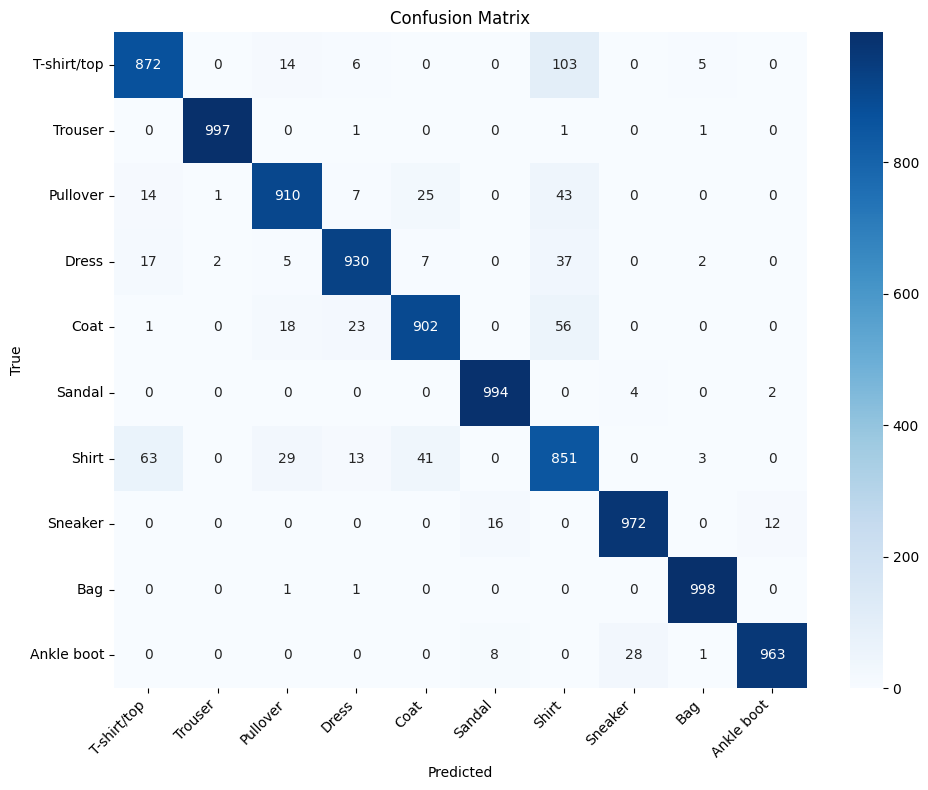

In [ ]:
# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix with numbers
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

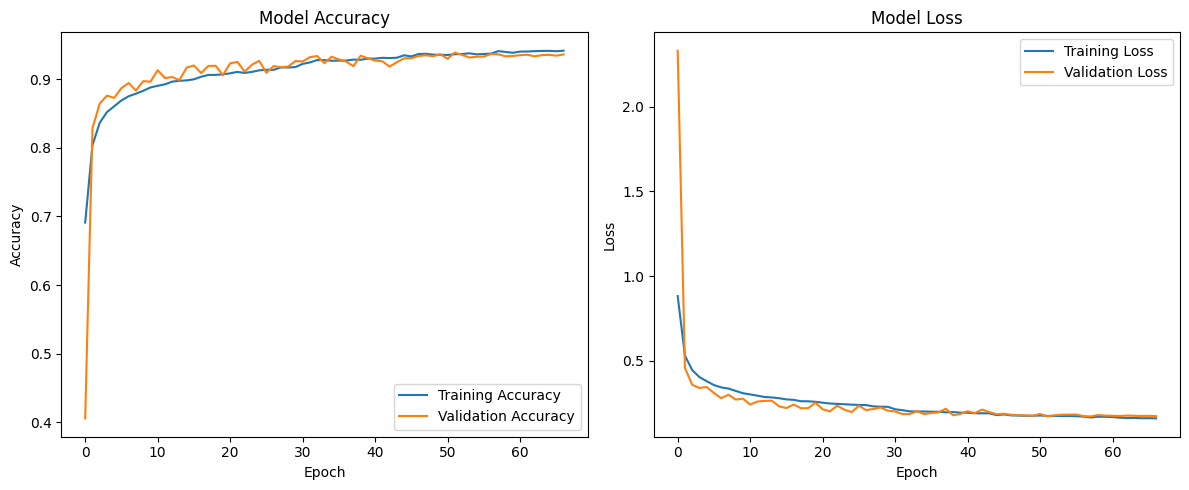

In [ ]:
# 9. Visualize training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


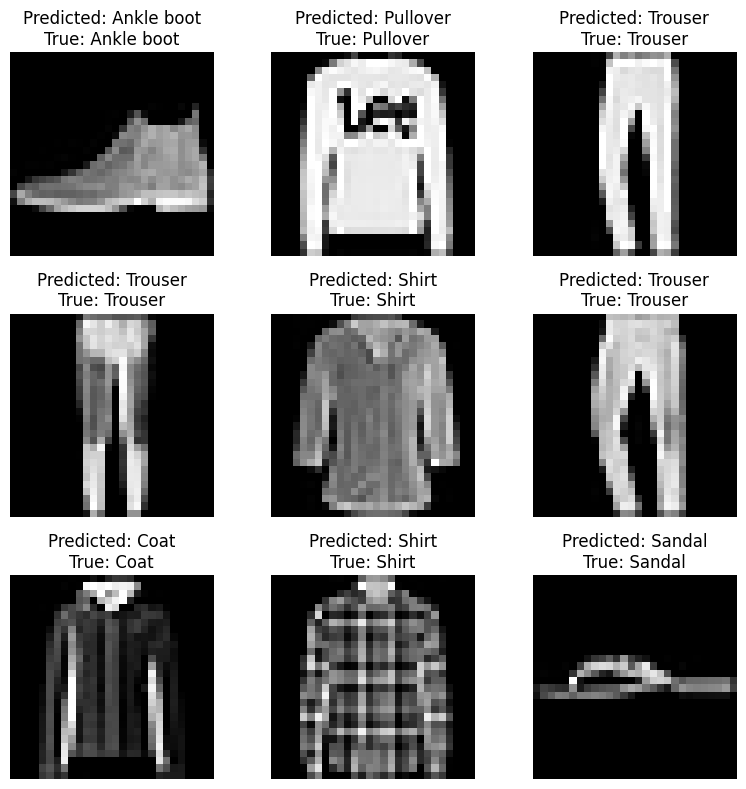

In [ ]:
# 10. Make predictions and visualize some results
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Display some test images with predictions
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

##          

# **Inference**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image, ImageOps
import io
from google.colab import drive, files

import warnings
warnings.filterwarnings('ignore')

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Load the trained model
model = load_model('/content/drive/MyDrive/Fashion_MNIST/fashion_mnist_best_model.keras')

# Step 3: Define class names (same as training)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Step 4: Preprocessing function
def preprocess_image(uploaded_file):
    """Preprocess uploaded image to match Fashion-MNIST format"""
    # Load image from byte stream
    original_img = Image.open(io.BytesIO(uploaded_file))

    # Convert to grayscale
    grayscale_img = original_img.convert('L')

    # Resize to 28x28 pixels
    resized_img = grayscale_img.resize((28, 28), Image.Resampling.LANCZOS)

    # Invert image (since Fashion MNIST has white background)
    inverted_img = ImageOps.invert(resized_img)

    # Convert to numpy array and normalize
    img_array = img_to_array(inverted_img).astype('float32') / 255.0

    # Reshape to (1, 28, 28, 1)
    img_array = img_array.reshape(1, 28, 28, 1)

    return original_img, inverted_img, img_array

# Step 5: Prediction and visualization function
def predict_and_visualize(uploaded_file):
    """Run prediction and display results with sorted confidence bars"""
    # Preprocess image
    original_img, processed_img, model_input = preprocess_image(uploaded_file)

    # Make prediction
    predictions = model.predict(model_input)
    pred_probs = predictions[0]
    pred_class = np.argmax(pred_probs)
    confidence = np.max(pred_probs)

    # Sort predictions by confidence (descending)
    sorted_indices = np.argsort(pred_probs)[::-1]
    sorted_probs = pred_probs[sorted_indices]
    sorted_class_names = [class_names[i] for i in sorted_indices]

    # Plotting - 3 subplots in a single row
    plt.figure(figsize=(18, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title(f'Original Image\n(Size: {original_img.size})')
    plt.axis('off')

    # Processed image (28x28)
    plt.subplot(1, 3, 2)
    plt.imshow(processed_img, cmap='gray')
    plt.title('Processed Image\n(28x28 pixels)')
    plt.axis('off')

    # Prediction graph
    plt.subplot(1, 3, 3)
    bars = plt.barh(sorted_class_names, sorted_probs, color='skyblue')
    plt.xlabel('Confidence Score')
    plt.title(f'Prediction: {class_names[pred_class]}\nConfidence: {confidence:.2%}')
    plt.xlim(0, 1)

    # Add confidence percentages to bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.02,
                bar.get_y() + bar.get_height()/2,
                f'{width:.2%}',
                ha='left',
                va='center')

    plt.gca().invert_yaxis()  # Show highest confidence at top
    plt.tight_layout()
    plt.show()

    return class_names[pred_class], float(confidence)

Mounted at /content/drive


⬆️ Please upload a fashion item image (T-shirt, dress, shoe, etc.)
💡 Tip: For best results, use centered images with plain backgrounds


Saving download.jpg to download.jpg

🔍 Analyzing: download.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


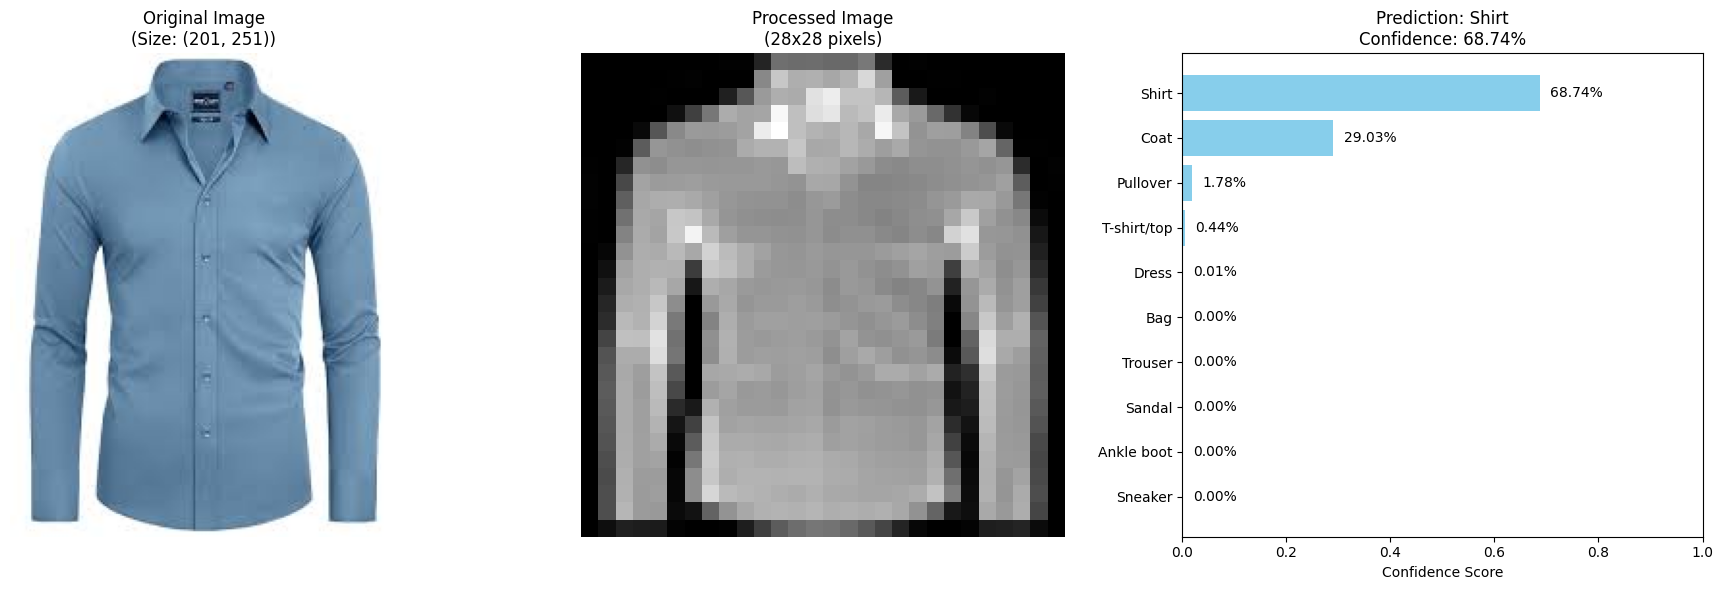


✅ Final Prediction: Shirt (68.74% confidence)


In [ ]:
# Step 6: Upload and run prediction
print("⬆️ Please upload a fashion item image (T-shirt, dress, shoe, etc.)")
print('💡 Tip: For best results, use centered images with plain backgrounds')
uploaded = files.upload()

# Step 7: Loop through each uploaded image
for filename in uploaded:
    print(f'\n🔍 Analyzing: {filename}')
    try:
        pred_class, confidence = predict_and_visualize(uploaded[filename])
        print(f'\n✅ Final Prediction: {pred_class} ({confidence:.2%} confidence)')
    except Exception as e:
        print(f'❌ Error processing {filename}: {str(e)}')